In [24]:
%pylab inline

from matplotlib import rc

fig_font = {'family':'sans-serif','sans-serif':['Helvetica'],
           'serif':['Helvetica'],'size':14}
rc('font',**fig_font)
rc('legend',fontsize=18, handletextpad=0.5)
rc('text', usetex=True)
rc('figure', figsize=(3.33,2.22))
#  rc('figure.subplot', left=0.10, top=0.90, bottom=0.12, right=0.95)
rc('axes', linewidth=0.5, color_cycle= ['#496ee2', '#8e053b', 'm', '#ef9708', 'g', 'c'])
rc('lines', linewidth=1)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [25]:
def fig_to_file(fig, filename, ext):
    fig.savefig("graphs/%s.%s" % (filename, ext), format=ext, bbox_inches='tight')

In [26]:
import csv
clients = {1,2,3,4,5,6,7,8,9}
latency = {}
latency_by_client = {}
time_by_client = {}

for c in clients:
    latency[c]=[]
    latency_by_client[c] = {}
    time_by_client[c] = {}
    for client in range(1,c+1):
        with open('results/04-26-105037/3s'+str(c)+'c/latency_'+str(client)+'.csv', newline='') as csvfile:
            latency_by_client[c][client] = []
            time_by_client[c][client] = []
            start_time = 0.0
            start_set = False
            for row in csv.reader(csvfile):
                # latency in ms
                val = int(row[2])/1000000 
                latency[c].append(val)
                latency_by_client[c][client].append(val)
                
                # we assume all experiments run within a min
                if not(start_set):
                    start_time = float(row[0].rsplit(" ")[1].rsplit(":")[2])
                    start_set = True
                
                time = (float(row[0].rsplit(" ")[1].rsplit(":")[2]) - start_time)*1000
                time_by_client[c][client].append(time)

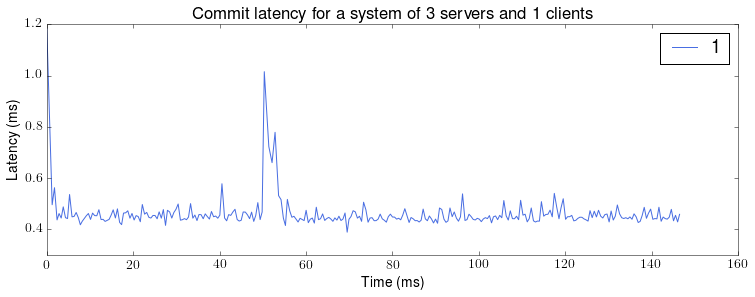

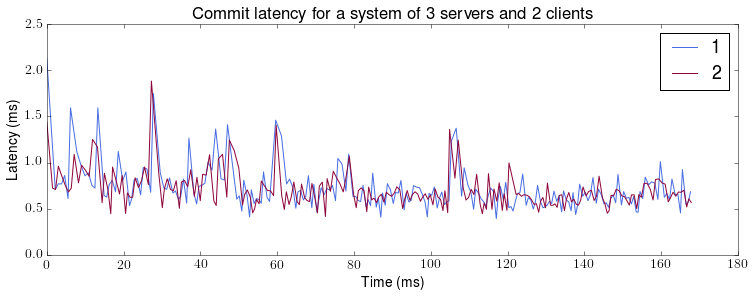

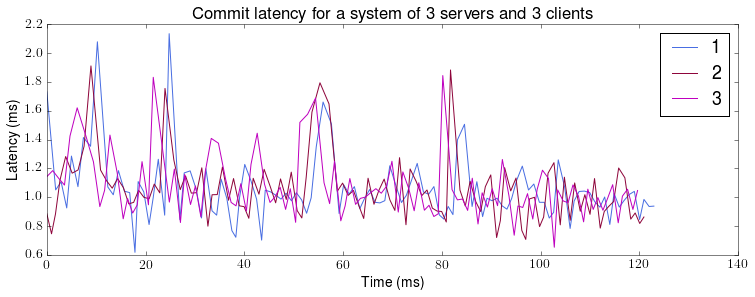

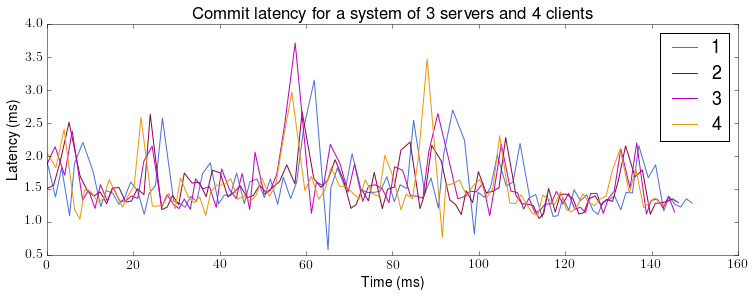

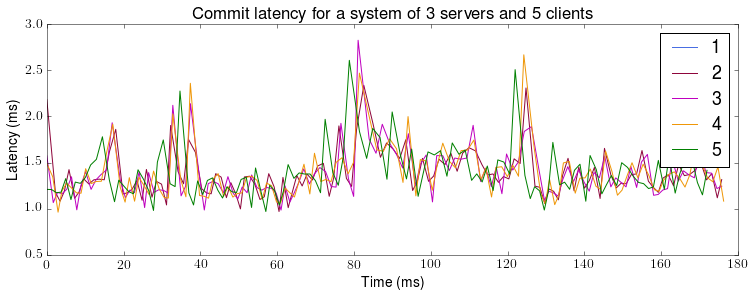

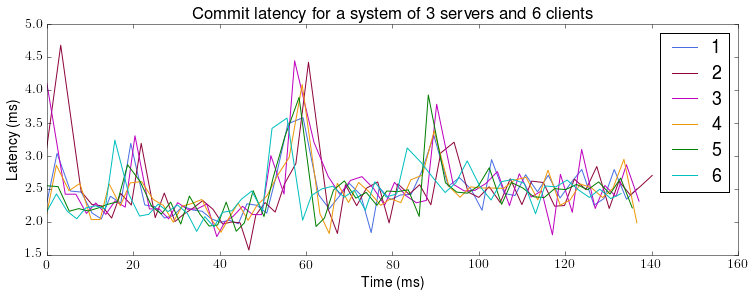

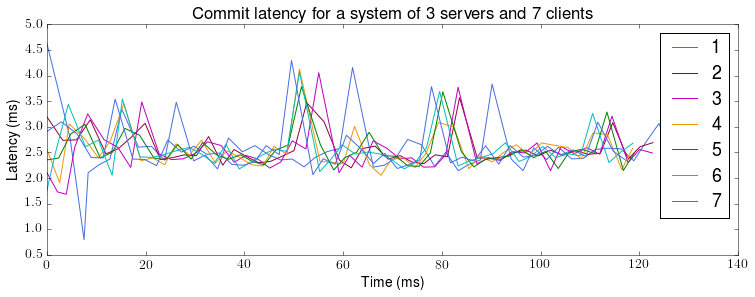

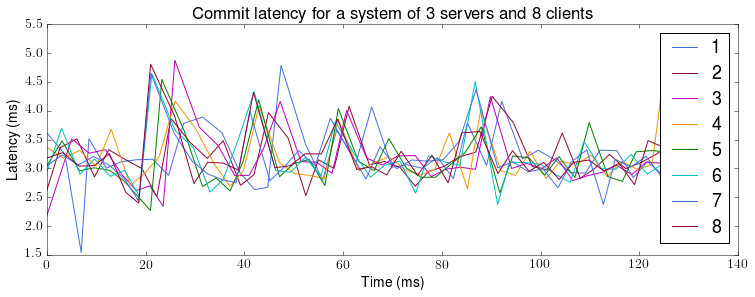

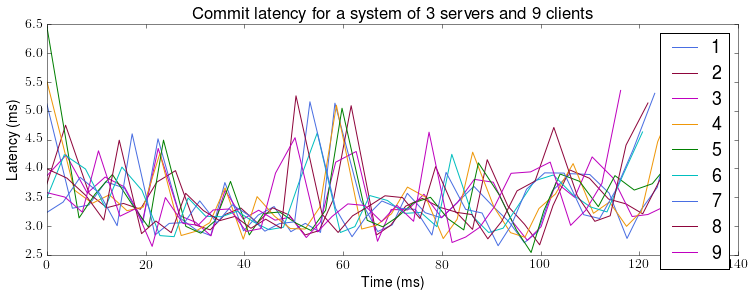

In [27]:
# plotting latency over actual time (for X client systems)

for c in clients:
    fig = plt.figure(figsize=[12,4])
    axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

    axes.set_xlabel('Time (ms)')
    axes.set_ylabel('Latency (ms)')
    axes.set_title('Commit latency for a system of 3 servers and '+str(c)+' clients')

    for client in range(1,c+1):
        axes.plot(time_by_client[c][client],latency_by_client[c][client]) 

    axes.legend(range(1,c+1),loc=1,frameon=True)



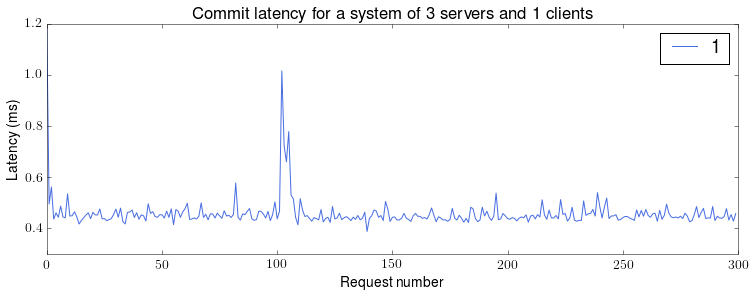

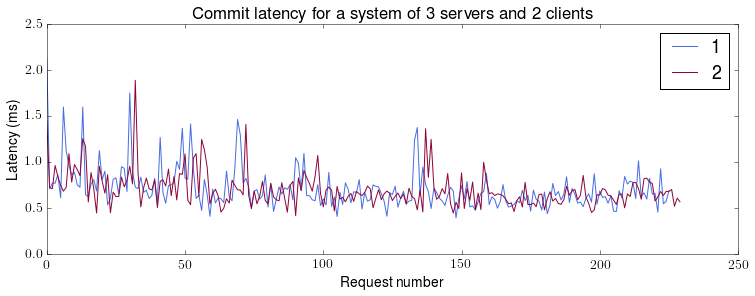

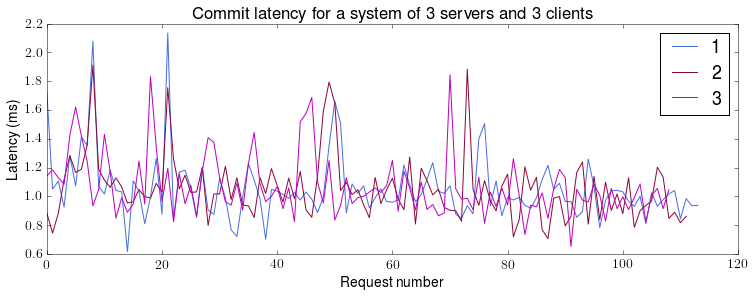

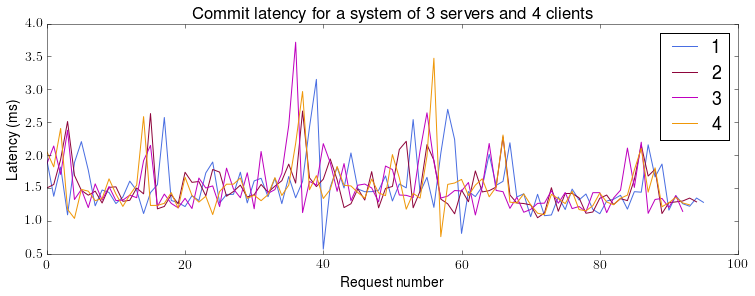

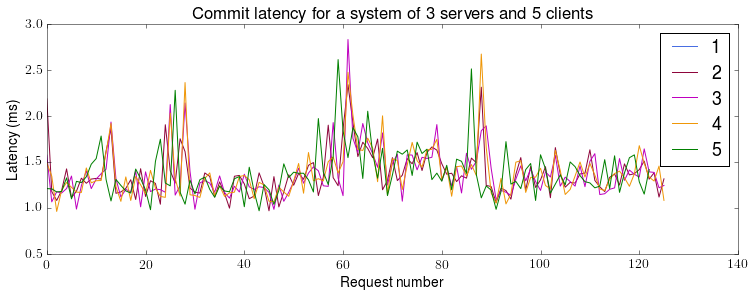

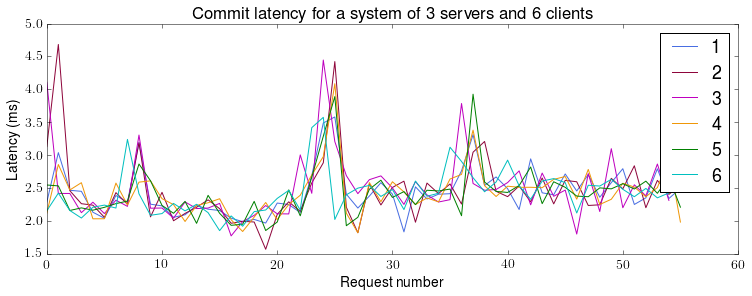

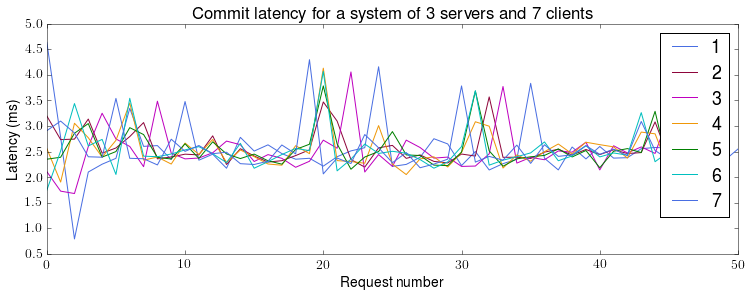

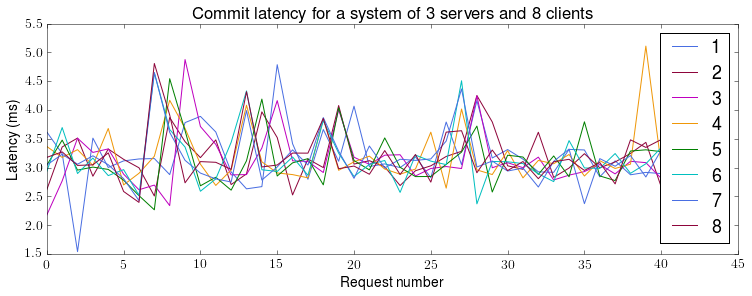

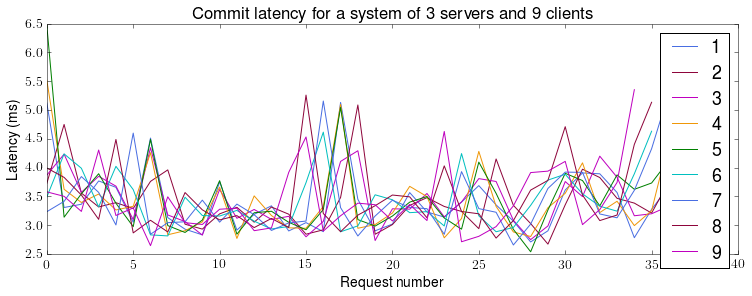

In [28]:
# plotting latency over request time (for X client system)

for c in clients:
    fig = plt.figure(figsize=[12,4])
    axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

    axes.set_xlabel('Request number')
    axes.set_ylabel('Latency (ms)')
    axes.set_title('Commit latency for a system of 3 servers and '+str(c)+' clients')

    for client in range(1,c+1):
        axes.plot(latency_by_client[c][client]) 

    axes.legend(range(1,c+1),loc=1,frameon=True)


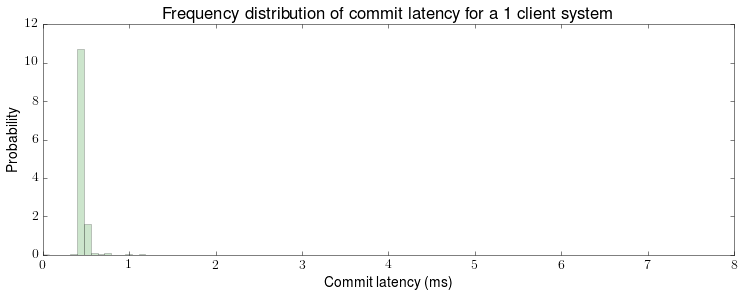

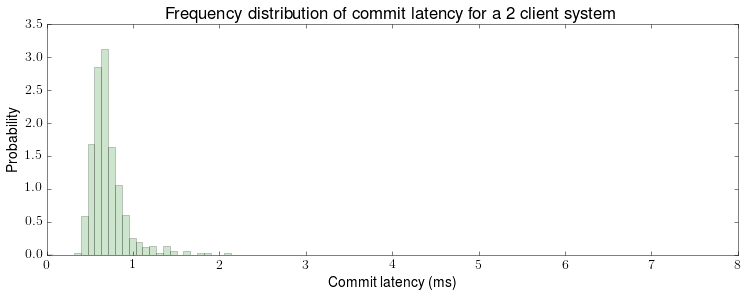

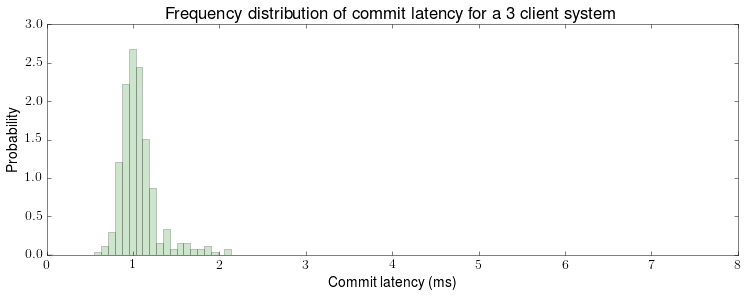

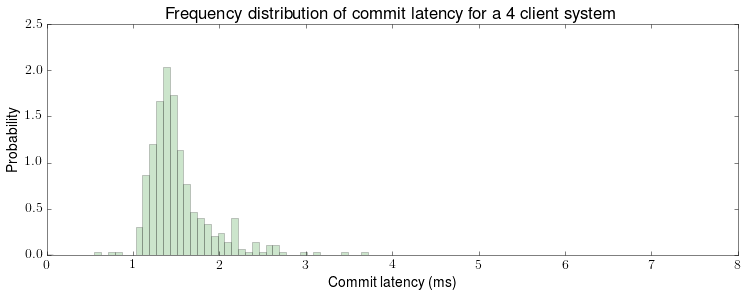

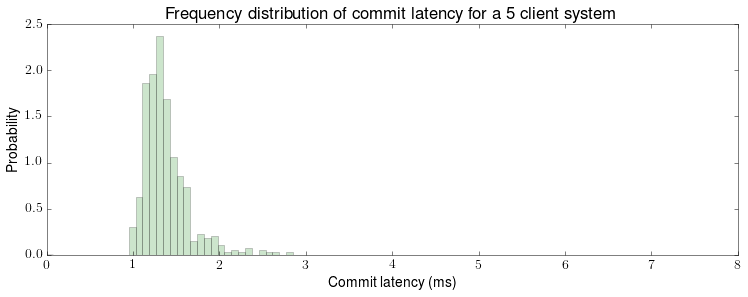

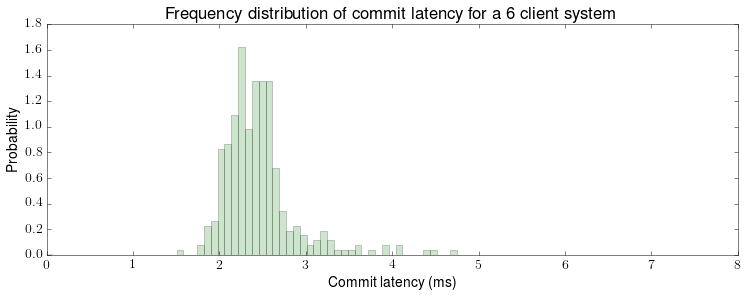

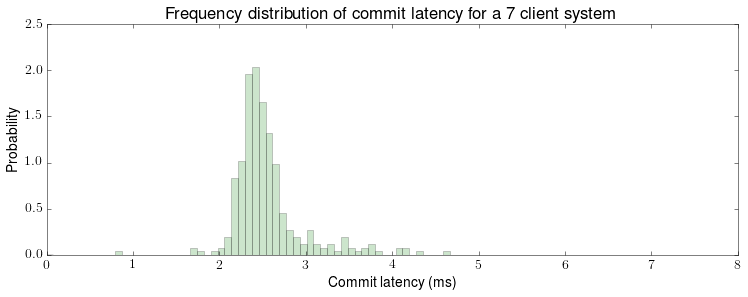

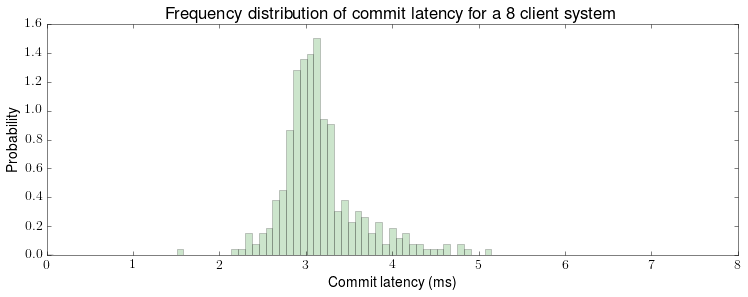

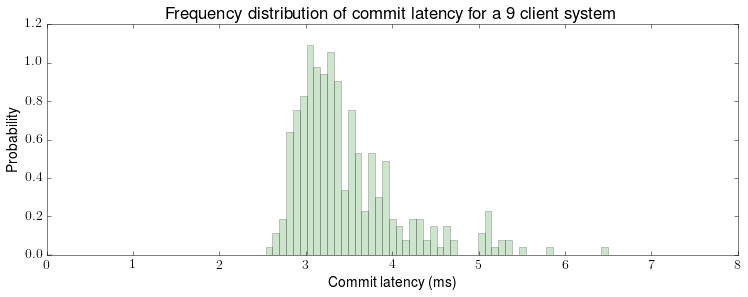

In [29]:
# plot latency distribution (for X client system)

for c in clients:
    fig = plt.figure(figsize=[12,4])
    axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

    axes.set_xlabel('Commit latency (ms)')
    axes.set_ylabel('Probability')
    axes.set_title('Frequency distribution of commit latency for a '+str(c)+' client system')

    n, bins, patches = axes.hist(latency[c], 101,range=[0,8],facecolor='green', normed=1, alpha=0.2)



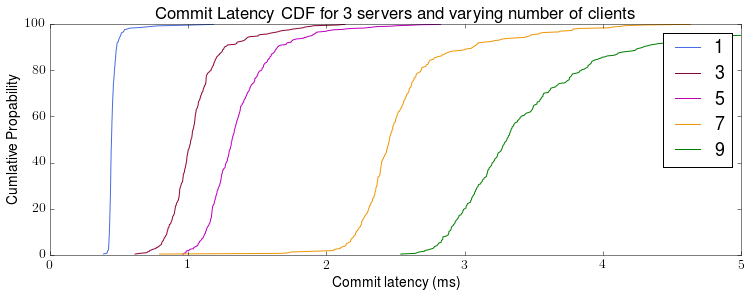

In [30]:
# plot simple CFD

latency_sorted = {}
cdf_y = {}

for c in clients:
    latency_sorted[c] = latency[c]
    latency_sorted[c].sort()
    cdf_y[c]=[]
    size=len(latency_sorted[c])
    for y in range (1,size+1):
        cdf_y[c].append(y*100.0/size)
    

fig = plt.figure(figsize=[12,4])
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

axes.set_xlabel('Commit latency (ms)')
axes.set_ylabel('Cumlative Propability')
axes.set_title('Commit Latency CDF for 3 servers and varying number of clients')

axes.set_xlim([0,5])
axes.set_ylim([0,100])

mini_clients = [1,3,5,7,9]

for c in mini_clients:
    axes.plot(latency_sorted[c], cdf_y[c])

axes.legend(mini_clients,loc=1,frameon=True)

{1, 2, 3, 4, 5, 6, 7, 8, 9}
[2.1790484448447214, 1.417819925073005, 0.9445768969957562, 0.65602289649030709, 0.72849184641462605, 0.40795780915438246, 0.39202077589346429, 0.31567004635707924, 0.28801444943216309]
[0.44615050000000001, 0.65762950000000009, 1.0210090000000001, 1.4327535, 1.3191409999999999, 2.3973499999999999, 2.4557060000000002, 3.0852710000000001, 3.3069489999999999]


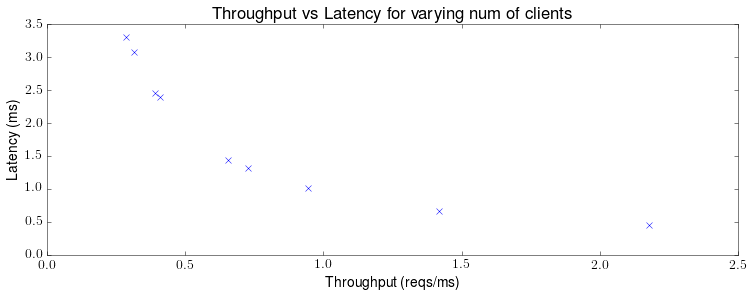

In [31]:
# plotting throughput vs latency

medium_latency=[]
throughput=[]

for c in clients:
    total_latency = np.sum(latency[c])
    number_reqs = len(latency[c])
    throughput.append(number_reqs / total_latency)
    medium_latency.append(np.percentile(latency[c],50))
    
fig = plt.figure(figsize=[12,4])
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

axes.set_xlabel('Throughput (reqs/ms)')
axes.set_ylabel('Latency (ms)')
axes.set_title('Throughput vs Latency for varying num of clients')

axes.plot(throughput, medium_latency,"bx") 

print(clients)
print(throughput)
print(medium_latency)


In [32]:
# for other numbers of servers

serv_latency = {}
serv_cdf_y = {}
servs = [3,5,7,9]

for s in servs:
    serv_latency[s]=[]
    with open('results/'+str(s)+'s1c/latency_0.csv', newline='') as csvfile:
        for row in csv.reader(csvfile):
            # latency in ms
            val = int(row[2])/1000000 
            serv_latency[s].append(val)
    print(s)
    print(np.percentile(serv_latency[s],50))
    
    serv_cdf_y[s]=[]
    size=len(serv_latency[s])
    for y in range (1,size+1):
        serv_cdf_y[s].append(y*100.0/size)
    

fig = plt.figure(figsize=[12,4])
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

axes.set_xlabel('Commit latency (ms)')
axes.set_ylabel('Cumlative Propability')
axes.set_title('Commit Latency CDF for one client and varying number of servers')

axes.set_xlim([0,5])

for s in servs:
    serv_latency[s].sort()
    axes.plot(serv_latency[s], serv_cdf_y[s])

axes.legend(servs,loc=1,frameon=True)

FileNotFoundError: [Errno 2] No such file or directory: 'results/3s1c/latency_0.csv'